In [1]:
import pandas as pd
import numpy as np

# Introduction to Statistics and Indicators in Finance

Most fields in finance rely on some sort of data analysis given their respective objective. For example in fundamental analysis of a business, various numbers from the company itself (i.e. from the balance sheet) and such indicators representing the overall market are used in order to price the companies stock. The results from such analyses are utilised in making decisions regarding for example an investement in said company. There are many well established techniques and statistics for pricing financial products. Yet, the search for indicators or ways in generel to foresee an investement's future performance is ever ongoing. Especially since the dawn of more powerful algorithms and artificial intelligence being more readily available for the public. 

In this chapter, we will take a look at statistics, that are the very basis of such analyses and examine some examples that would lead the way to more sophisticated procedures.  

## Returns

In order for an investment to be profitable, the money it yields must be higher than the inital investment made (plus some transaction costs which is the amount paid to make the investment, e.g. the money you'd pay a bank so that they buy some stocks for you). If we want to assess how much the value of an investment increased (or decreased), we look at the so called return. The usual, i.e. discrete, return is defined as the relative change in value $S$. In mathematical terms, we look at the ratio of the past and the present value and subtract one:

$$ r_t = \frac{S_t - S_{t-1}}{S_{t-1}} =\frac{S_t}{S_{t-1}} - 1 $$ 

Note here that one time step $t$ is of arbitrary length. Two examples: daily returns imply that the price of two successive days are used. Monthly returns would be calculated by using prices that are separated by the time span of one month.


### Additivity

One may be confronted with returns based on different time spans, that need to be taken into account or that somehow need to be compared to each other. This could require a means of aggregating these returns in order to bring them to the same time scale. The property we are looking for is called addititvity, i.e. the sum of the shorter-scale returns should be equal to the larger-scale return. Working with the example above, we could face the need to aggregate the daily returns to get monthly returns. We thus wish to be able to add all daily returns of one month in order to get the monthly return. Note while this is possible, as explained in the following, we can't just split monthly returns into daily returns without making assumptions on the distribution of these artificial daily returns.  
We'll now choose a slightly different example of daily and weekly returns (in this example, we assume seven trading days). To calculate weekly returns from daily returns, we mustn't use the daily return as is.  
Let's consider the following values:


time $t$       |  0   |   1  |   2   |   3    |   4   |   5   |   6   |   7   
-------------|------|------|-------|--------|-------|-------|-------|----------
prices $S_t$  |  100 |  110 |  121  |  110   |  132  |  105  |  112  |   105  
return $r_t$ |  --- | 0.10 |  0.10 |  -0.09 |  0.2  |  -0.20 |  0.07 | -0.06

If we simply added all returns, we'd find a weekly return of $r_{0,7} = 0.12$. However, using the correct formula from above, we find that

$$ r_{0,7} = \frac{S_7}{S_{0}} - 1 = \frac{105}{100} - 1  = 0.05 $$

and conclude that indeed daily returns cannot simply be added up in order to yield the weekly return.

#### log-returns

With a single transformation however, we can can establish the desired additivity over time. The transformation needed is taking the logarithm. There are basically two ways of seeing the calculation of these so called log returns, which are equivalent. Either logarithmise the (daily) **prices** and simply get the difference between sucessive values. Or logarithmise the ratio of the past and current price:  

$$ r_t^{log} = \log{\frac{S_t}{S_{t-1}}} $$  

$$ \downarrow(\log{\frac{x}{y}} = \log{x}- \log{y})$$  

$$ = \log{S_t} - \log{S_{t-1}} $$  

These log returns, or continuous returns, now exhibit the qualities the discrete returns from the example above lacked.  
Let's have a look at the same table after taking the logarithm and try the same aggregation from above.

time $t$       |  0   |   1  |   2   |   3    |   4   |   5   |   6   |   7   
-------------|------|------|-------|--------|-------|-------|-------|----------
prices $S_t$  |  100 |  110 |  121  |  110   |  132  |  105  |  112  |   105  
log return $r_t^{log}$ |  --- | 0.10 |  0.10 |  -0.10 |  0.18  |  -0.23 |  0.06 | -0.06

Now, we add all log returns up and find the weekly log return to be $ r_{0,7} = 0.05 $. 
To convert log returns to discrete returns, we simply take the exponent (the inverse of the logarithm) of the log return **and subtract 1**, which will also result in a value of $0.05$.  

Having a look at the math with logarithmised prices, we can unveil the characteristics of this additive behaviour:  

$$ r_{t=2}^{log} =\log{\frac{S_t}{S_{t-1}}} = \log{S_{t=2} - \log{S_{t=0}}} $$  

$$\downarrow \text{"add zero": } - \log{S_{t=1}} + \log{S_{t=1}} = 0 $$  

$$ r_{0, t=2}^{log} =\log{S_{t=2} + 0 - \log{S_{t=0}}} $$

$$ r_{0, t=2}^{log} = (\log{S_{t=2} - \log{S_{t=1}}) + (\log{S_{t=1}} - \log{S_{t=0}}}) $$

$$ r_{0, t=2}^{log} = r_{1, t=2}^{log} + r_{0, t=1}^{log} $$


One may notice that the log returns are very close to the discrete returns. This is due to the fact, the logarithm behaves almost linear for values close to zero. So for small values of the discrete return, the log returns are very similar. Note that this applies almost always for daily returns and even shorter time spans. For a monthly return (or quarterly, yearly) there "is more time for the value to develop" and we usually find higher returns for larger time spans.  

Let's have a look at what we can achieve in python using the prices from the table above.

In [2]:
df = pd.DataFrame({
    'S': [100, 110, 121, 110, 132, 105, 112, 105],
    },
index=list(range(8)))
df

,S
0,100
1,110
2,121
3,110
4,132
5,105
6,112
7,105


We can calculate discrete returns simply by using a method of a Series object: `.pct_change()`.  
Note the `NaN` value for the first line.

In [3]:
df['discrete_returns'] = df.S.pct_change()
df

,S,discrete_returns
0,100,NaN
1,110,0.100000
2,121,0.100000
3,110,-0.090909
4,132,0.200000
5,105,-0.204545
6,112,0.066667
7,105,-0.062500


To calculate log returns with numpy's `np.log()`, we can either utilise the prices, logarithmise them and calculate the difference using `.diff()` or use the discrete returns by adding one before taking the logarithm.
For completeness, we also add a column with discrete returns calculated from the log returns.

In [4]:
# use prices and 
df['log_returns'] = np.log(df.S).diff()
df['log_returns_alt'] = np.log(df.discrete_returns.dropna()+1)
df['discrete_returns_from_log'] = np.exp(df.log_returns) - 1
df

,S,discrete_returns,log_returns,log_returns_alt,discrete_returns_from_log
0,100,NaN,NaN,NaN,NaN
1,110,0.100000,0.095310,0.095310,0.100000
2,121,0.100000,0.095310,0.095310,0.100000
3,110,-0.090909,-0.095310,-0.095310,-0.090909
4,132,0.200000,0.182322,0.182322,0.200000
5,105,-0.204545,-0.228842,-0.228842,-0.204545
6,112,0.066667,0.064539,0.064539,0.066667
7,105,-0.062500,-0.064539,-0.064539,-0.062500


### Portfolios and cross sectional additivity

So far, we established a way to track a single investment's performance over time using (log) returns. Now, we would also like to track the performance of a portfolio over time. A portfolio ($PF$) is a collection of investments. So if you had bought one share each from two different companies, these would form your portfolio. Portfolios can in general have different ways of being allocated, i.e. by the criteria the stocks are selected into the portfolio. Without loss of generality, we can describe a portfolio's value by the sum of its constituents. These are defined as the weight (fraction of total capital) of each single stock $w_i$ multiplied by the respective stock's value $S_i$.
$$ P_i = w_i \cdot S_i$$
where $i$ indicates the company.

Given the returns of the whole portfolio as time series data, we can just apply the methods from above. However, if we are given the prices of the single stocks of which the portfolio consists, we need a way to calculate the portfolio's performance in the cross section. Meaning we would like to calculate the performance from $t=0$ to $t=1$ for the entirety of stocks in our portfolio. To do so, will again resort to calculating returns.
For the cross sectional portfolio return, we now **must not use log returns**. Instead, discrete returns already possess the desired cross sectional additivity. Looking at the portfolio return, we'll use the price development of a single stock 
$$ P_{t+1}^i = P_t^i (1 + r_{t+1}^i) $$

It can now be derived, that discrete returns do indeed possess the cross sectional additivity
$$ r_{t+1}^{PF} = \sum_i P^i_t (1 + r_{t+1}^i) $$
$$ = \sum_i{w_i S_t} + \sum_i{w_i S_t r_{t+1}^i} $$
$$ = S_t \cdot (1 + \sum_i w_i r_{t+1}^i) $$
with $\sum_i w_i = 1$.  
 
Let's have a look at the following data:
   
time $t$       |  0   |   1  |   2   |   3    |   4   |   5   |   6   |   7   
-------------|------|------|-------|--------|-------|-------|-------|----------
company A $A_t$  |  100 |  110 |  121  |  110   |  132  |  105  |  112  |   105  
company B $B_t$  |  200 |  180 |  194  |  198   |  197  |  205  |  208  |   215  

For simplicity, we will assume to invest the same amount of money in both stocks. This gives $w_1=w_2=0.5$. This would for example mean we bought two shares of company A for a total of 200 monetary units (mu) and and one share of company B for the same amount of mu.  
We will now calculate the dauily returns of the portfolio using pandas:

In [5]:
df = pd.DataFrame({
    'A': [100, 110, 121, 110, 132, 105, 112, 105],
    'B': [200, 180, 194, 198, 197, 205, 208, 215],
    },
index=list(range(8)))
df

,A,B
0,100,200
1,110,180
2,121,194
3,110,198
4,132,197
5,105,205
6,112,208
7,105,215


In [6]:
df['A_return'] = df.A.pct_change()
df['B_return'] = df.B.pct_change()
df['pf_return'] = np.round((2 * df.A.shift()/400) * df.A_return + (df.B.shift()/400) * df.B_return, 4)


In [7]:
df

,A,B,A_return,B_return,pf_return
0,100,200,NaN,NaN,NaN
1,110,180,0.100000,-0.100000,0.0000
2,121,194,0.100000,0.077778,0.0900
3,110,198,-0.090909,0.020619,-0.0450
4,132,197,0.200000,-0.005051,0.1075
5,105,205,-0.204545,0.040609,-0.1150
6,112,208,0.066667,0.014634,0.0425
7,105,215,-0.062500,0.033654,-0.0175


We can take a closer look at the first two daily returns of the stocks and the portfolio:
- for $t=1$:
    - Our investment of 200 mu (2 shares) in Stock $A$ is now worth 220 mu, i.e. the return is 10 %
    - Our investment of 200 mu (1 share) in Stock $B$ is now worth 180 mu, i.e. the return is -10 %  
    $\rightarrow$ the portfolio's value stays the same as for $t=0$ 
- for $t=2$:
    - Our position of 220 mu in Stock $A$ is now worth 242 mu, i.e. the daily return is 10 %  
    - Our position of 180 mu in Stock $B$ is now worth 194 mu, i.e. the daily return is 8 %   
    $\rightarrow$ the portfolio's value increases to a total of 436 mu which means the daily return is $\frac{436}{400} - 1 = 0.09$

### Characteristics of returns 

Usually, returns exhibit the following:
- expected returns are close to zero (the shorter the time span, the smaller the expected return)
- weakly stationary (i.e. constant expected value and variance over time) **but** usually volatility clustering
- skewed distribution

From these items alone, we can start an analysis of stock returns by looking at some (standardized) moments of the empirical data:
- the average return as an estimate of the expected return
- the empirical variance or standard deviation/volatility 
- skewness (if negative: left skewed)
- (excess) kurtosis (larger $\rightarrow$ fat tails)

The average return can be seen as an indicator on how profitable a long term investment may be. The volatility is interpreted as a risk measure, i.e. the higher the volatility, the higher the risk. Skewness, especially left-skewdness, can indicate a higher probability of being exposed to larger losses. Finally, kurtosis means how "fat tailed" a distribution is and thus how exposed the investment would be to extreme values, both positive and negative. If we talk about excess kurtosis, we subtract a value of 3. this reference value is the kurtosis of a standard normal distribution.

In pandas, we can take a look at these moments by calling the appropriate methods. We will have a look at real-world data, downloading close prices using the yfinance package and calculating the returns. 

In [8]:
import yfinance as yf

msft = yf.Ticker('MSFT').history(start="2020-01-01")

In [9]:
msft = msft[['Close']]
msft['daily_return'] = msft['Close'].pct_change()
msft.dropna(inplace=True)

In [10]:
avg_return = msft.daily_return.mean()
vola = msft.daily_return.std()
skew = msft.daily_return.skew()
kurtis = msft.daily_return.kurt()


print(f'average return {np.round(avg_return,4)}')
print(f'volatility {np.round(vola, 4)}')
print(f'skewness {np.round(skew, 4)}')
print(f'kurtosis {np.round(kurtis, 4)}')

average return 0.0012
volatility 0.0204
skewness 0.0141
kurtosis 6.5948


As we discussed in earlier chapter, it is always recommended to take a look at some charts.  
We can plot returns over time as well as look at the distribution.

<AxesSubplot: xlabel='Date'>

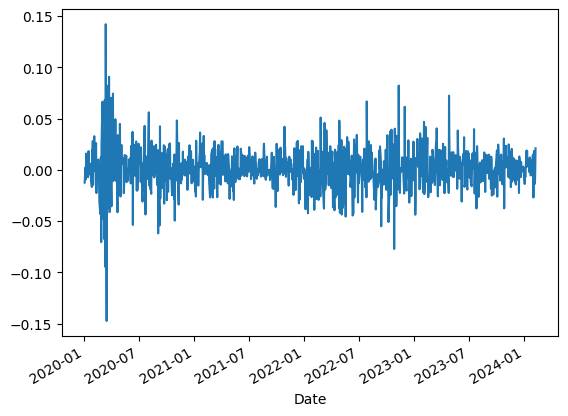

In [11]:
msft.daily_return.plot()

Over time, we see that the volatility is far from constant, something that is often knowingly ignored/downplayed. Even though it is found  in almost every time series of returns given a sufficiently long observation period.

To look at the distribution, we already know which plot to utilise.

<AxesSubplot: xlabel='daily_return', ylabel='Count'>

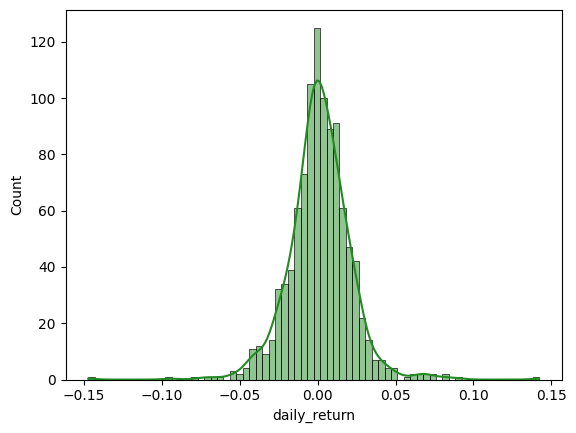

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(msft.daily_return, color='forestgreen', kde = True)

From the kernel density estimation (solid line), we can in fact see the left-skewedness of the distribution, meaning we find more negative returns of larger values.

### Indicators

In order to determine the performance, different indicators can be consulted. When it comes to trading, a whole universe of technical indocators exiists, all seeking to predict future performance.

A classic example of a performance measure is the Sharpe ratio. It is a rather simple measure to indicate the (excess) return of an investment in relation to the risk to which it was exposed, where the risk is measured by the volatility of the (excess) return.

#### Technical indicators 

Technical indicators are used in technical analysis and calculated using historical stock prices and/or the trading volume. Technical analysis in general aims at forecasting prices or market movements in order to generate revenue by trading. Note however, on average it is not possible to outperform the market using these very commonly known indicators. Technical indicators are usually designed to capture patterns of price movements, like long term development or short term returns. It is these patterns that are then meant to be exploited.

Usually, some sort of chart is produced for the indicator in order to identify patterns as the "rules"
for indicators may vary from trader to trader. These rules are defined as indicator specific signals, e.g. critical values or sub-patterns, which tell the trader to sell or buy the stock. 

As a simple example, we can have a look at the the golden cross. It is found by comparing the 200 days and 50 days simple moving average of the close price and considering it a buy-signal, if the 50 day (fast) moving average takes on higher values than the (slow) 200 days moving average.

Again, there is are methods available for pandas series: `.rolling()` creates an object similar to what we know from `groupby()`. Calling `.mean()` on this object then calculates the mean of the days in this time window.

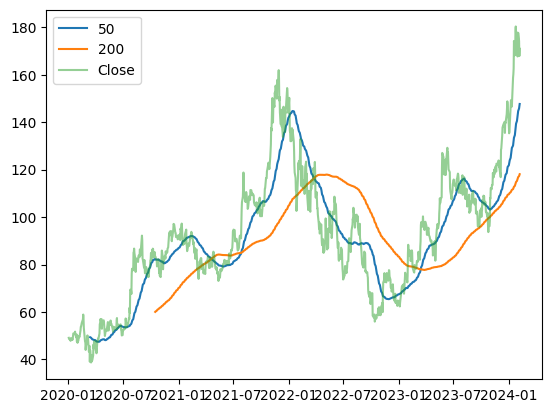

In [13]:
mmm = yf.Ticker('AMD').history(start="2020-01-01")
mmm['SMA_50'] = mmm.Close.rolling(50).mean()
mmm['SMA_200'] = mmm.Close.rolling(200).mean()

plt.figure()
plt.plot(mmm.SMA_50, label='50')
plt.plot(mmm.SMA_200, label='200')
plt.plot(mmm.Close, label='Close', alpha=.5)
plt.legend()
plt.show()

In the graph, we can see one golden crossing, where the blue line crosses above the orange line (only after a short drop below).
This would indicate to buy the stock at the time of the crossing. A strategy that would have worked if for example selling before the lines switch their order again later. 

In [14]:
import pandas as pd
df = yf.Ticker('AAPL').history(start='2021-01-01')
df.reset_index(inplace=True, drop=True)

def awe_osc(high, low, fast=5, slow=34):
    if slow < fast:
        fast, slow = slow, fast
        
    median_price = 0.5 * (high + low)
    fast_sma = median_price.rolling(fast).mean()
    slow_sma = median_price.rolling(slow).mean()
    ao = fast_sma - slow_sma

    # Name and Categorize it
    ao.name = f"AO_{fast}_{slow}"
    return pd.DataFrame(ao)

ao = awe_osc(df.High, df.Low)

In [15]:
ao[30:35]

,AO_5_34
30,NaN
31,NaN
32,NaN
33,-2.868465
34,-4.985443


In [16]:
ao['shift_diff'] = ao > ao.shift()

<AxesSubplot: >

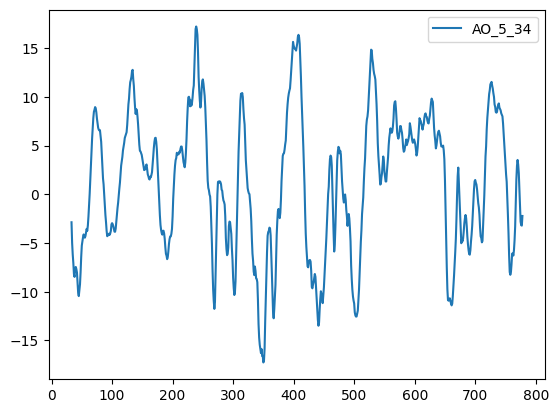

In [17]:
ao.plot()

The standard graph for the awesome oscillator is a bar plot in red and green, where the color captures the price movement from one increment to the next: red for a lower price, green for a higher price.

We can have a look [here](https://www.ifcm.co.uk/ntx-indicators/awesome-oscillator) for an explanation of the indicator and the rules.

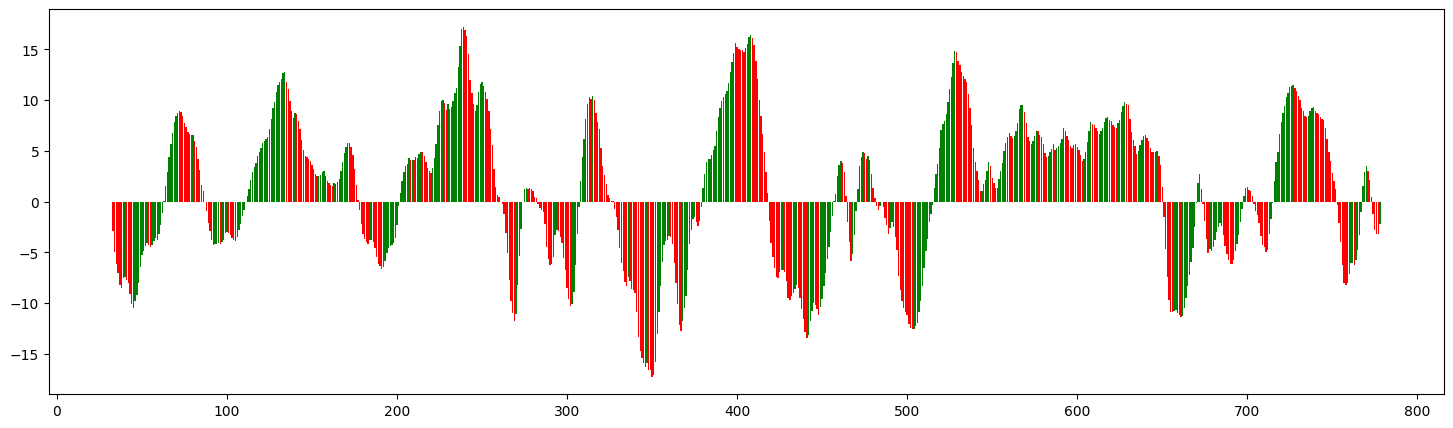

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18,5))
plt.bar(ao[ao.shift_diff==1].index, ao[ao.shift_diff==1].AO_5_34, color='green')
plt.bar(ao[ao.shift_diff==0].index, ao[ao.shift_diff==0].AO_5_34, color='red')
plt.show()

ao['signal'] = ao.shift_diff.astype(int)